## Develop A Neural Network That Can Read Handwriting

### Dataset link: https://en.wikipedia.org/wiki/MNIST_database

Steps that we will follow are -


1) MNIST Handwritten Digit Classification Dataset

2) Model Evaluation Methodology

3) To Develop a Baseline Model

4) To Develop an Improved Model

5) Then we will Finalize the Model and Make Predictions



IMPORTING REQUIRED LIBRARIES 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading the dataset

In [37]:
mnist= tf.keras.datasets.mnist

Dividing the images and their outputs into x_train and x_test sets

In [38]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Identifying the data set images, which needed to be verified by the neural network.

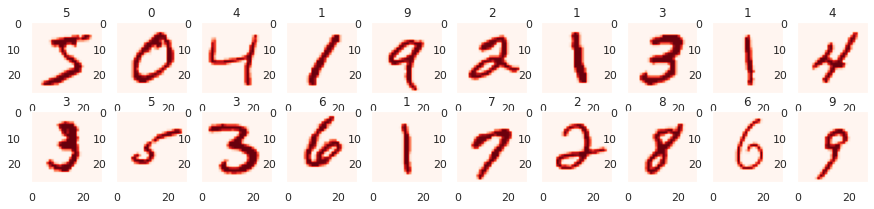

In [39]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

## Printing the data images into metrics form

In [40]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

# Normalizing the matrix array of number images 

In [41]:
xtrain = x_train/255.0
xtest = x_test/255.0

Flattening the 2-dimensional array into one dimensional array or a single column; which will behave as 1st inpur layer for neural network

In [42]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Using of AdamOptimizer - algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients

In [44]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Fitting of the training data into the model for 5 iterations

In [45]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2642 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1145 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9858


98% Accuracy achieved with 5 iterations
*Fitting* of the training data into the model for 9 *iterations*

In [46]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 3/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0201 - accuracy: 0.9938
Epoch 5/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0147 - accuracy: 0.9959
Epoch 6/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9967
Epoch 8/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 9/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - accuracy: 0.9959


### 99% Accuracy achieved with 9 iterations

In [47]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 21.8165 - accuracy: 0.9780
[21.816505432128906, 0.9779999852180481]


## 97 % of total accuracy of our neural network has been achieved

In [48]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 4.9407 - accuracy: 0.9892 - val_loss: 2.7286 - val_accuracy: 0.9932
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.2327 - accuracy: 0.9941 - val_loss: 3.0227 - val_accuracy: 0.9918
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.6106 - accuracy: 0.9951 - val_loss: 3.1224 - val_accuracy: 0.9930
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.8048 - accuracy: 0.9942 - val_loss: 2.8436 - val_accuracy: 0.9933
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.7513 - accuracy: 0.9950 - val_loss: 3.0982 - val_accuracy: 0.9923
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.5945 - accuracy: 0.9946 - val_loss: 2.6136 - val_accuracy: 0.9938
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.6174 - accuracy: 0.9950 - val_loss: 3.3711 - val_accuracy:

## Plotting Accuracy of Model

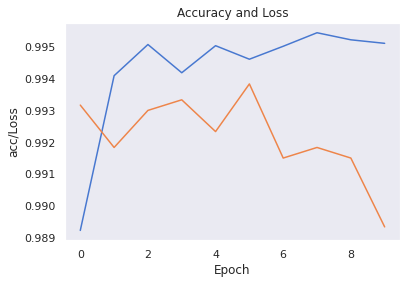

In [49]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

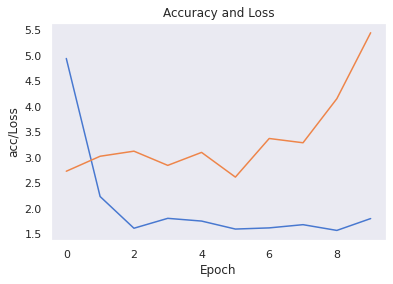

In [50]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

## Testing Our Model

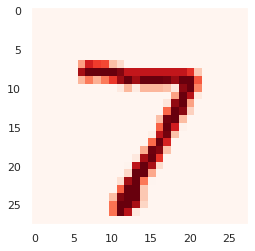

In [51]:
plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [52]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

7


It has successfully predicted it as number 7. 

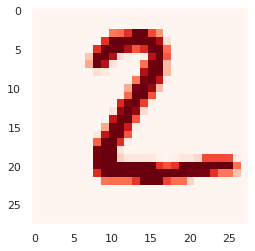

In [53]:
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [54]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2


# We have finally Predicted the handwriting using neural network. 